<a href="https://colab.research.google.com/github/effection00/ds-section1-sprint1/blob/master/n113a%202%EC%B0%A8%20%EC%A0%9C%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자본총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자본총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정
- 이후 `concat`으로 합치기
- 합친 이후의 index를 종목명으로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [ ]:
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
# '000080.csv'
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'

def mydf(myurl):
 df = pd.read_csv(urlhead + myurl,thousands=',')

#데이터를 transpose
 df = df.transpose() 
 new_header = df.iloc[0]
 df.columns = new_header
 
 #일부 feature 선택
 df = df[["매출액","자산총계","EPS(원)"]] #컬럼명 설정 후 feature 이름으로 찾기
 return df[-1:] #제일 최근 분기

#concat으로 합치기
df = pd.concat([  mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])

data = ['화이트진로','보해양조','롯데칠성','마니커','이지홀딩스','하림']
df['종목명'] = data
df.index = df['종목명']


print(df.shape)

#인덱스 drop
df.reset_index(drop=True,inplace=True)
df

(6, 4)


Unnamed: 0,매출액,자산총계,EPS(원),종목명
0,6243,39617,453,화이트진로
1,205,1555,3,보해양조
2,5980,34066,1682,롯데칠성
3,521,1897,-61,마니커
4,4108,18966,1168,이지홀딩스
5,2613,8550,62,하림


## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [ ]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 



df_tidy = df.melt(id_vars=['종목명'],value_vars=['매출액','자산총계','EPS(원)'],value_name='Value',var_name='Feature')
df_tidy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

,종목명,Feature,Value
0,화이트진로,매출액,6243
1,보해양조,매출액,205
2,롯데칠성,매출액,5980
3,마니커,매출액,521
4,이지홀딩스,매출액,4108
5,하림,매출액,2613
6,화이트진로,자산총계,39617
7,보해양조,자산총계,1555
8,롯데칠성,자산총계,34066
9,마니커,자산총계,1897


In [ ]:
df_tidy['Value'] = df_tidy.Value.astype('int64')
df_tidy['Value'].dtypes

box_plot = sns.boxplot(data = df_tidy, x = '종목명', y = 'Value');
#박스 개수
res = len(box_plot.get_xticklabels())
res

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [ ]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

df2 = pd.merge(left, right,how='outer')
df2 = df2.dropna(subset=['A','B'])

from IPython.display import HTML
HTML(df2.to_html(index=False))


key1,key2,A,B,C,D
K0,K0,A0,B0,C0,D0
K0,K1,A1,B1,NaN,NaN
K1,K0,A2,B2,C1,D1
K1,K0,A2,B2,C2,D2
K2,K1,A3,B3,NaN,NaN


## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [ ]:
import numpy as np

def grade(df, df2, df_tidy, res):
  score = 0
  score += (df['매출액'][2] == 5980)
  score += (df['자산총계'][3] == 1897)   
  score += (df2.equals(pd.DataFrame({
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))) 
  score += (res == 6)
  score += (round(df_tidy['Value'].mean(), 3) == 7090.444)
  return(score)

In [ ]:
grade(df, df2, df_tidy, res)

5

## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [ ]:
import urllib.request
import csv
from bs4 import BeautifulSoup

url_1 = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36'
html = urllib.request.urlopen(url_1).read()
soup = BeautifulSoup(html,'html.parser')


soup.select('div.box_type_l')


[<div class="box_type_l" style="margin-top:0">
 <form name="field_form">
 <input name="menu" type="hidden" value="theme"/>
 <input name="returnUrl" type="hidden" value="http://finance.naver.com/sise/sise_group_detail.nhn?type=theme&amp;no=36"/>
 <div class="subcnt_sise_item sub810"><div class="subcnt_sise_item_top sub810t">
 <table cellpadding="0" cellspacing="0" class="item_list" summary="원하시는 항목을 선택하여 결과를 보실 수 있습니다.">
 <caption>항목 선택표</caption>
 <col width="15%"/><col width="15%"/><col width="15%"/><col width="15%"/><col width="15%"/><col width="15%"/>
 <tr>
 <td class="choice"><input checked="" id="option1" name="fieldIds" type="checkbox" value="quant"/> <label for="option1">거래량</label></td>
 <td class="choice"><input checked="" id="option2" name="fieldIds" type="checkbox" value="ask_buy"/> <label for="option2">매수호가</label></td>
 <td class="choice"><input checked="" id="option3" name="fieldIds" type="checkbox" value="amount"/> <label for="option3">거래대금</label>(백만)</td>
 <td><input i

In [ ]:
import pandas as pd
import seaborn as sns

dat = pd.DataFrame({
    'name' : ['해운', '대마'],
    'value' : [10000,5000]
})

In [ ]:
import pandas as pd
import seaborn as sns

dat = pd.DataFrame({
    'name' : ['해운', '대마'],
    'value' : [10000,5000]
})

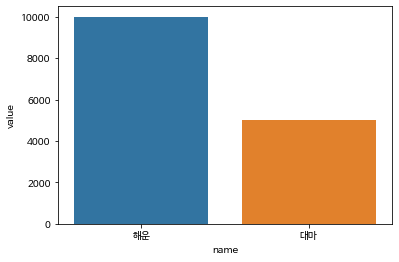

In [ ]:
sns.barplot(x = 'name', y = 'value', data = dat);